## Importing required libraries

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd

## 1. Implement PCA (40 points)

In [2]:
def PCA(X, n_components):
        mean = np.mean(X)
#         X -= mean
        cov = np.cov(X.T)
        eigvects, eigvals = np.linalg.eig(cov)
        eigvects = eigvects.T
        idxs = np.argsort(eigvals)[::-1]
        eigvects = eigvects[idxs]
        eigvals = eigvals[idxs]
        components = eigvects[:n_components]
        return np.dot(X, components.T)

## 2. load data.mat file and reduce dimensionality of x to 2 dimensions  (30 points)


In [3]:
data = loadmat("data.mat")
X, y = data['x'], data['y']
X_reduced = PCA(X, 2)

## 3. Plot the reduced 2 dimensions and show the color based on y  (10 points)

C:\Users\Ali & Alifia's Home\AppData\Roaming\Python\Python39\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


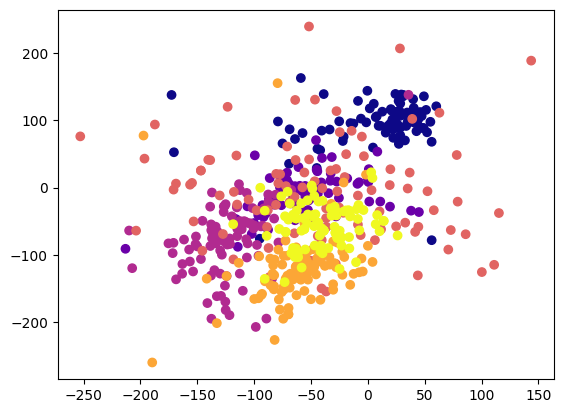

In [4]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y, edgecolors=None, cmap='plasma');

## 4. Compare the results with the t-SNE view from sklearn  (10 points)

In [5]:
from sklearn.manifold import TSNE

model = TSNE()
Xtsne_reduced = model.fit_transform(X)
Xtsne_reduced.shape

(567, 2)

## 5. Explain the differences and why (10 points)

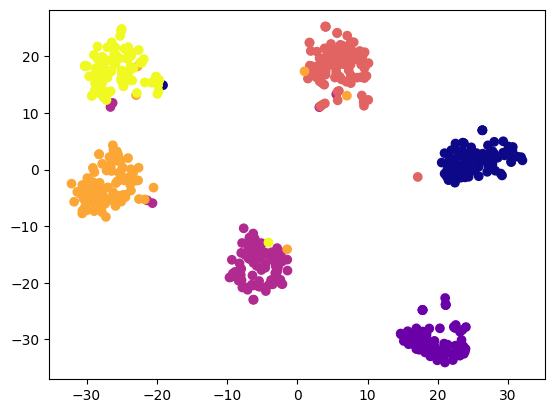

In [6]:
plt.scatter(Xtsne_reduced[:,0], Xtsne_reduced[:, 1], c=y,edgecolors=None, cmap='plasma');

The main differences why there is a lot of differences in between TSNE and PCA are following
- PCA might have been effected by outliers while TSNE wouldn't
- PCA preserves global structure while TSNE preserves local one